<a href="https://colab.research.google.com/github/SalhRosas/Pepperdine/blob/main/Async2_2_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Trees 

*   Used fir Classification of problems, estimate, or do Regression
*   The top of the tree is called the **root node** intermediate nodes have arrows pointing to and away from them. 

*   the nodes at the bottom of the tree w/out any edges pointing away from them are called leaves  
*   impurity: refers to the fact that none of the leaves have a 100% "yes" 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import requests

In [3]:
#url = "https://raw.githubusercontent.com/SalhRosas/Pepperdine/main/adult_dataset.csv"
url = "https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/adult_ch6_training"


In [4]:
adult_tr = pd.read_csv(url)
adult_tr.head()
adult = adult_tr
adult.head()

,Marital status,Income,Cap_Gains_Losses
0,Never-married,<=50K,0.02174
1,Divorced,<=50K,0.00000
2,Married,<=50K,0.00000
3,Married,<=50K,0.00000
4,Married,<=50K,0.00000


Data Processing


In [5]:
y = adult_tr[['Income']]

In [6]:
y.head()

,Income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


We have a categorival variable, marital status, among our predictors. The CART model implemented in the sklearn package needs categorical variables converted to a dummy variable form. thus, we will make a series of dummy variables for marital status using the categorical() command.

In [7]:
mar_np = np.array(adult_tr['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, dictnames = True) #, drop = True

#stattools.categoricals(mar_np)

/usr/local/lib/python3.10/dist-packages/statsmodels/tools/tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [8]:
mar_cat

array([['Never-married', 0.0, 0.0, 1.0, 0.0, 0.0],
       ['Divorced', 1.0, 0.0, 0.0, 0.0, 0.0],
       ['Married', 0.0, 1.0, 0.0, 0.0, 0.0],
       ...,
       ['Married', 0.0, 1.0, 0.0, 0.0, 0.0],
       ['Divorced', 1.0, 0.0, 0.0, 0.0, 0.0],
       ['Married', 0.0, 1.0, 0.0, 0.0, 0.0]], dtype=object)

we turn the variable marital status into an array using array (), then use the categorical() command from the stattool package to create a matrics of dummyvariables for each value of marital status. we save the matrix and disctionary separately using (mar_cat,mar_cat_dict)

The matrix mar_cat contains five columns, one for each category in the original Marital status varaible. each row represents a record in the adult_tr data set. Each row will have a 1 i the column which matches the value that record had in the original Martial status variable. You can tell which column represents which category by examinging mar_cat_dict. In our case, the first row of mar_cat has a 1 i nthe third column. By examining mar_car_dict, we know the third column represents the "never married" category . sure enough , the first record of adult_tr has "never married" as the marital status variable value. 

Now, we need to add the newly made dummy variables back in to the X vairables. 

In [9]:
mar_cat_pd = pd.DataFrame(mar_cat)
x = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)


In [10]:
mar_cat_pd.head()

,0,1,2,3,4,5
0,Never-married,0.0,0.0,1.0,0.0,0.0
1,Divorced,1.0,0.0,0.0,0.0,0.0
2,Married,0.0,1.0,0.0,0.0,0.0
3,Married,0.0,1.0,0.0,0.0,0.0
4,Married,0.0,1.0,0.0,0.0,0.0


In [11]:
mar_cat_pd.columns = ['MS', "1", "2", "3", "4", "5"]

In [12]:
mar_cat_pd

,MS,1,2,3,4,5
0,Never-married,0.0,0.0,1.0,0.0,0.0
1,Divorced,1.0,0.0,0.0,0.0,0.0
2,Married,0.0,1.0,0.0,0.0,0.0
3,Married,0.0,1.0,0.0,0.0,0.0
4,Married,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
18756,Divorced,1.0,0.0,0.0,0.0,0.0
18757,Married,0.0,1.0,0.0,0.0,0.0
18758,Married,0.0,1.0,0.0,0.0,0.0
18759,Divorced,1.0,0.0,0.0,0.0,0.0


In [13]:
x.head()

,Cap_Gains_Losses,0,1,2,3,4,5
0,0.02174,Never-married,0.0,0.0,1.0,0.0,0.0
1,0.00000,Divorced,1.0,0.0,0.0,0.0,0.0
2,0.00000,Married,0.0,1.0,0.0,0.0,0.0
3,0.00000,Married,0.0,1.0,0.0,0.0,0.0
4,0.00000,Married,0.0,1.0,0.0,0.0,0.0


# We first make the mar_cat matrix a data frame using the DataFrame() command. We then use the concat() command to attach the predictor variable Cap_Gains_Losses to the data frame of the dummy variables that represent marital status. We save the resutl as x. 
Before we run the CART algorithm, note that the column of x do not include the dif values of the marital status variable. Run mar_car_dict to see that the first column is for the value "divoced" the second for "Married", and so on. Since the first column of x is cap_gains_losses, we can specify the names of each column of x.

In [14]:
x_names = ["Cap_Gains_Losses", "Divorced", "Marries", "Never-Married", "Separated", "Widowed"]
x.head()

,Cap_Gains_Losses,0,1,2,3,4,5
0,0.02174,Never-married,0.0,0.0,1.0,0.0,0.0
1,0.00000,Divorced,1.0,0.0,0.0,0.0,0.0
2,0.00000,Married,0.0,1.0,0.0,0.0,0.0
3,0.00000,Married,0.0,1.0,0.0,0.0,0.0
4,0.00000,Married,0.0,1.0,0.0,0.0,0.0


It will help us when visualizing the CART model to know the levels of y as well.

In [15]:
y_names = ['<=50K', ">50K"]

In [16]:
y.head()

,Income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [17]:
x2 =pd.concat((adult_tr[["Cap_Gains_Losses"]], mar_cat_pd), axis = 1)

In [18]:
x2.head()

,Cap_Gains_Losses,MS,1,2,3,4,5
0,0.02174,Never-married,0.0,0.0,1.0,0.0,0.0
1,0.00000,Divorced,1.0,0.0,0.0,0.0,0.0
2,0.00000,Married,0.0,1.0,0.0,0.0,0.0
3,0.00000,Married,0.0,1.0,0.0,0.0,0.0
4,0.00000,Married,0.0,1.0,0.0,0.0,0.0


In [19]:
x2 = x2.drop(columns = ['MS'])

In [20]:
dt = DecisionTreeClassifier(criterion= 'gini', max_leaf_nodes=5)

In [21]:
dt.fit(x2, y)

DecisionTreeClassifier(max_leaf_nodes=5)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

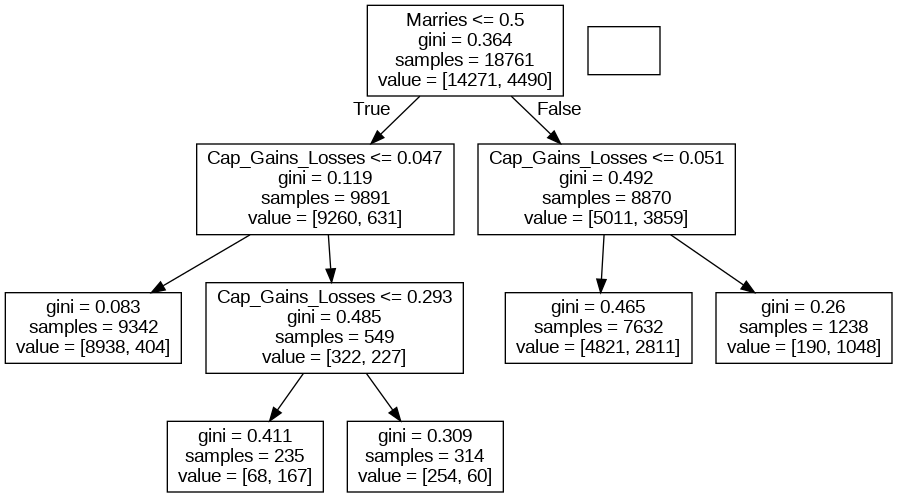

In [23]:
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, feature_names= x_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [24]:
cart01 = DecisionTreeClassifier(criterion= 'gini', max_leaf_nodes=5).fit(x2, y)

In [25]:
export_graphviz(cart01, out_file = "test.dot", feature_names=x_names, class_names=y_names)

In [26]:
predIncomeCART = cart01.predict(x2)

In [27]:
c50_01 = DecisionTreeClassifier(criterion= "entropy", max_leaf_nodes=5).fit(x2,y)

In [28]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [29]:
rfy = np.ravel(y)


In [30]:
rf01 = RandomForestClassifier(n_estimators= 100, criterion = "gini").fit(x2,rfy)

In [31]:
rf01.predict(x2)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)